<a href="https://colab.research.google.com/github/Data-Intelligence-Mastery/data_science_interview_questions/blob/master/Q015_confidence_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence intervals for a dataset

`Data Analysis, Python, Pandas, Statistics, Confidence Intervals`

Given the following dataset which contains the close price for a given stock, can you plot confidence intervals for the data set? The output should be a plot with the stock price and confidence intervals shown on the same plot.

In [42]:
import pandas as pd
path = 'https://raw.githubusercontent.com/Data-Intelligence-Mastery/data_science_interview_questions/master/data/stock%20price.csv'
df = pd.read_csv(path)

from tabulate import tabulate as tb
print(tb(df.head(),headers='keys', tablefmt='psql'))

+----+----------+---------+
|    | Date     |   Close |
|----+----------+---------|
|  0 | 1/2/2018 | 1065    |
|  1 | 1/3/2018 | 1082.48 |
|  2 | 1/4/2018 | 1086.4  |
|  3 | 1/5/2018 | 1102.23 |
|  4 | 1/8/2018 | 1106.94 |
+----+----------+---------+


Theory behind confident interval can be found [here](https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing)



In [43]:
df['datetime'] = pd.to_datetime(df['Date'])
df = df.set_index(['datetime'])
df.drop(['Date'], axis=1, inplace=True)
print(tb(df.head(),headers='keys', tablefmt='psql'))

+---------------------+---------+
| datetime            |   Close |
|---------------------+---------|
| 2018-01-02 00:00:00 | 1065    |
| 2018-01-03 00:00:00 | 1082.48 |
| 2018-01-04 00:00:00 | 1086.4  |
| 2018-01-05 00:00:00 | 1102.23 |
| 2018-01-08 00:00:00 | 1106.94 |
+---------------------+---------+


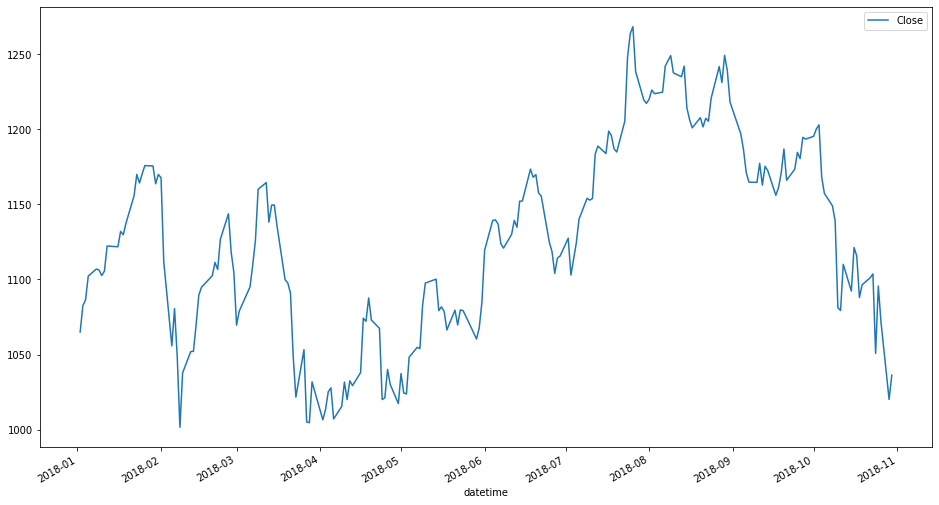

In [0]:
df.plot(figsize=(16,9))

Now let's calculate 95% confidence interval.
Assuming the close price follows a normal distribution, 

95% interval = mean +/- 1.96*standard error

standard error = standard deviation/square root of sample number.



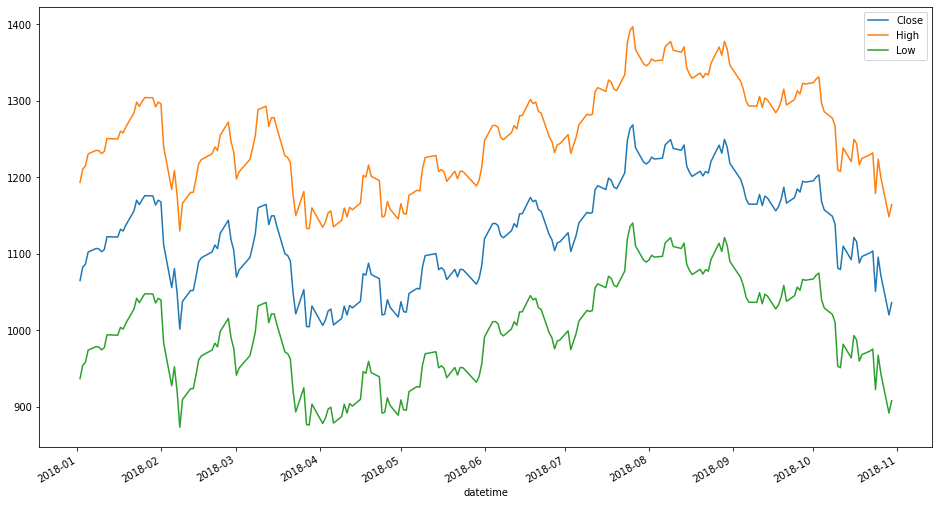

In [0]:
close_std = df['Close'].std()
close_high = df['Close'] + 1.96*close_std
close_low  = df['Close'] - 1.96*close_std

df['High'] = close_high
df['Low']  = close_low

df.plot(figsize=(16,9))

Let's plot confidence interval with error bars

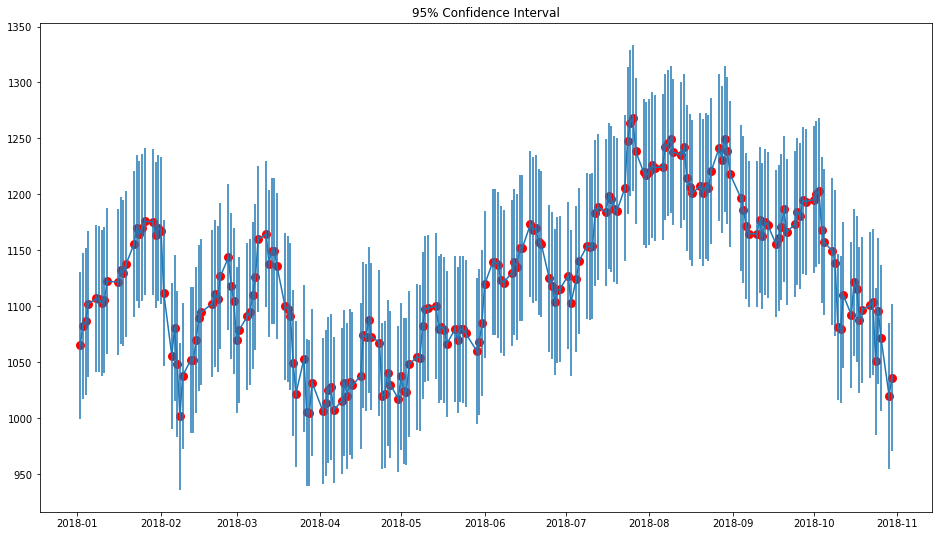

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,9))
plt.errorbar(df.index, df['Close'], close_std)
plt.scatter(df.index, df['Close'],ls='-', lw=3, marker='o', c='r')
plt.title('95% Confidence Interval')
plt.show()

## Confidence interval vs prediction interval [Reference](https://statisticsbyjim.com/hypothesis-testing/confidence-prediction-tolerance-intervals/)

### Confidence interval

Its calculations take `sample data` and produce a range of values that likely contains the `population` parameter that you are interested in.

A confidence interval of the prediction (an example of confidence interval) is a range that likely contains the **mean value of the dependent variable** given specific values of the independent variables.

### Prediction interval

It is a range that likely contains the *value of the dependent variable* for a single new observation given specific values of the independent variables. 

### Tolerance Intervals vs Confidence Intervals
A confidence interval estimates only the mean and the sampling error determines the width of a confidence interval. As the sample size approaches the whole population, the sample error decreases and the width of the CI approaches zero as it converges on the single value of the population mean.

A tolerance interval reflects the spread of values around the average. Both the **sampling error** and the **dispersion of values in the entire population** determine the widths of these ranges. As the sample size approaches the whole population, tolerance intervals don’t converge on a zero width. Instead, they converge on the actual width of the population associated with the percentage you specify.
